In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


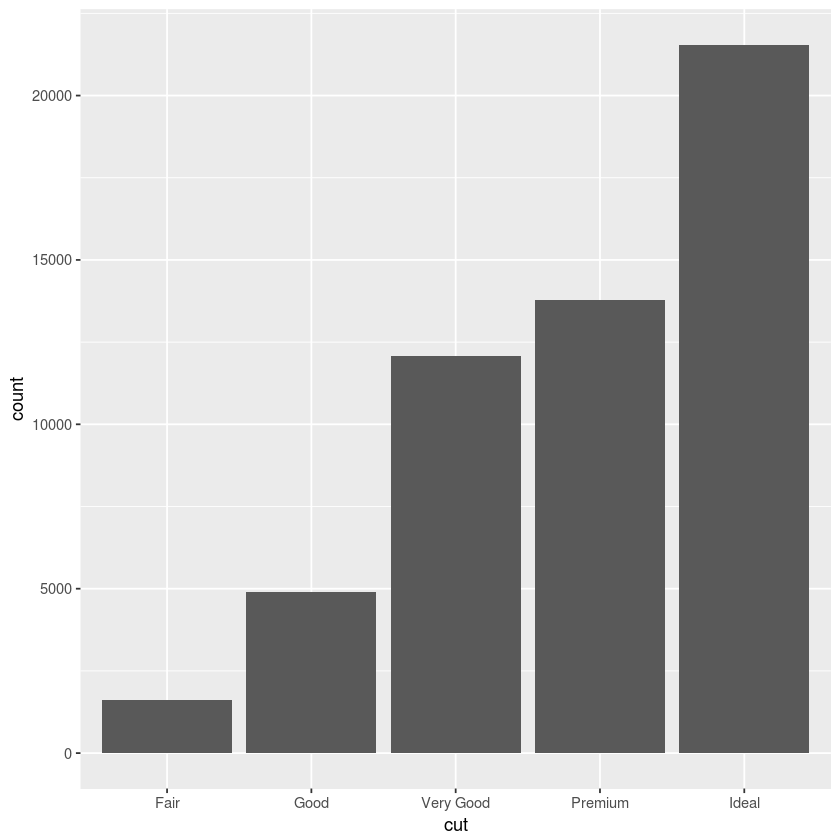

In [2]:
# to examine the distribution of a categorical variables, use a bar chart
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut))

In [3]:
# We can compute the values(observations) occured with each x value
diamonds %>%
count(cut)

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


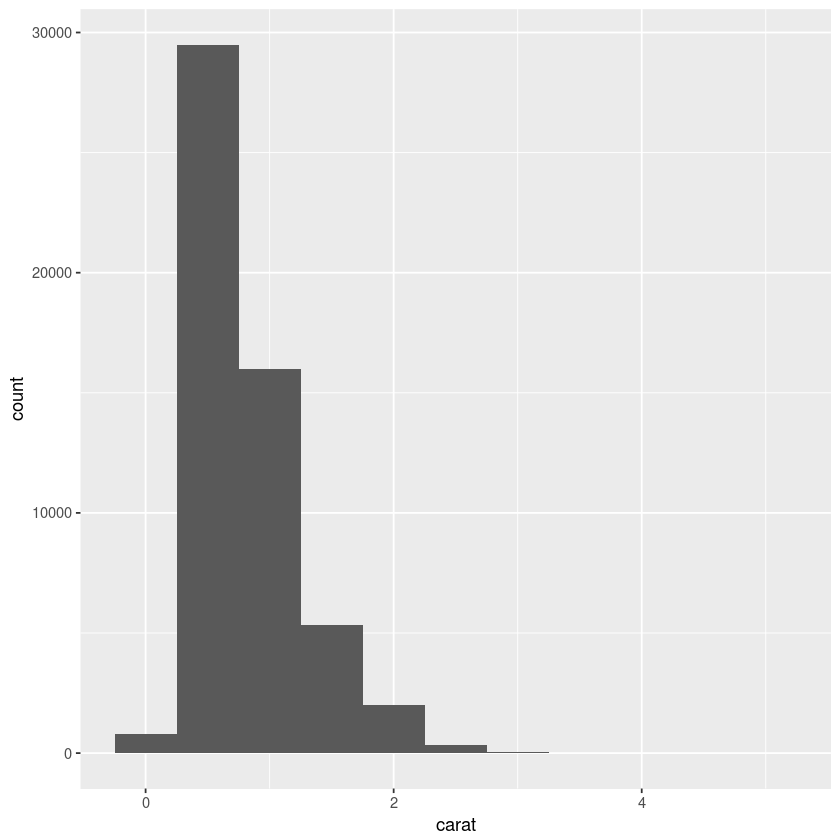

In [4]:
# A variable is continuous if it can take any of an infinite set of ordered  values.
# Numbers and date-times are two examples of continuous variables.
# Here, bin  = 0.5 means it will take cut in 0.5 ranges ( 0.15 to 0.25, 0.25 to 0.35)
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

In [5]:
# we can compute by combining count() and cut_width()
# here, 0.5 indicates ranges of cut width
diamonds %>%
count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4
"(4.25,4.75]",1


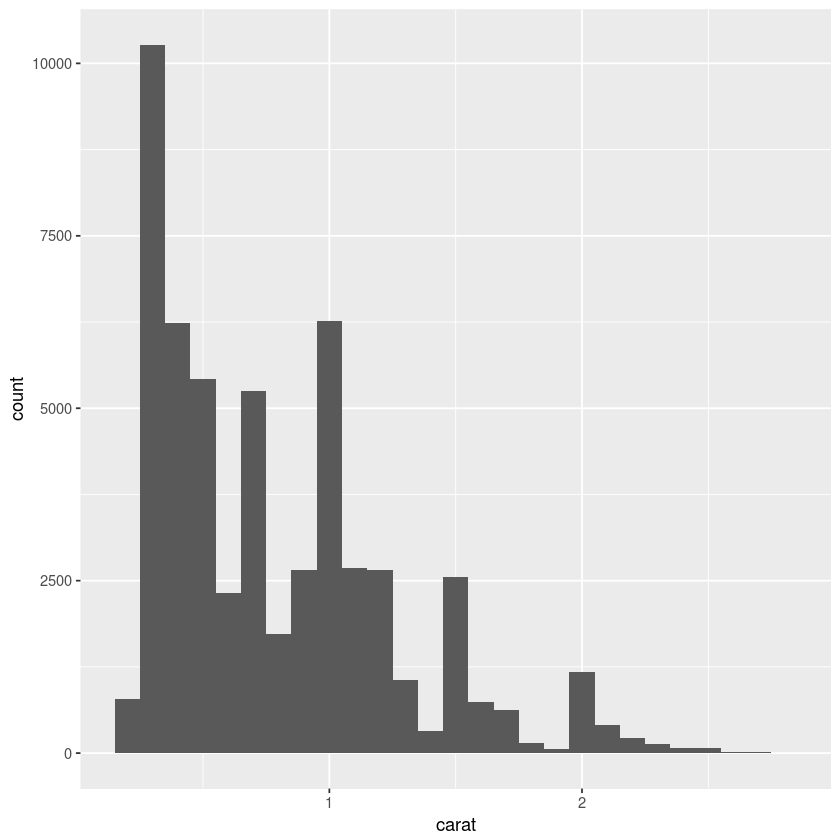

In [6]:
# For different bin sizes we can take a closer look at the histogram
smaller  <- diamonds %>%
filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) + geom_histogram(binwidth = 0.1)

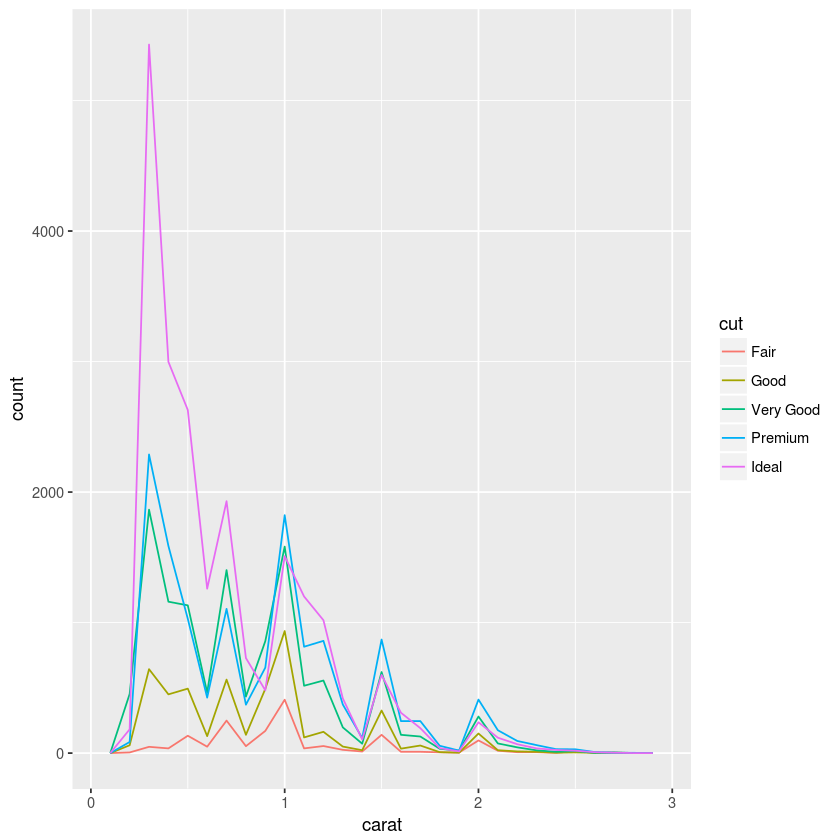

In [7]:
# geom_freqpoly = performs the same calculation as geom_histogram but instead of displaying the counts with bars
# uses lines instead.
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) + geom_freqpoly(binwidth = 0.1)

# Typical values

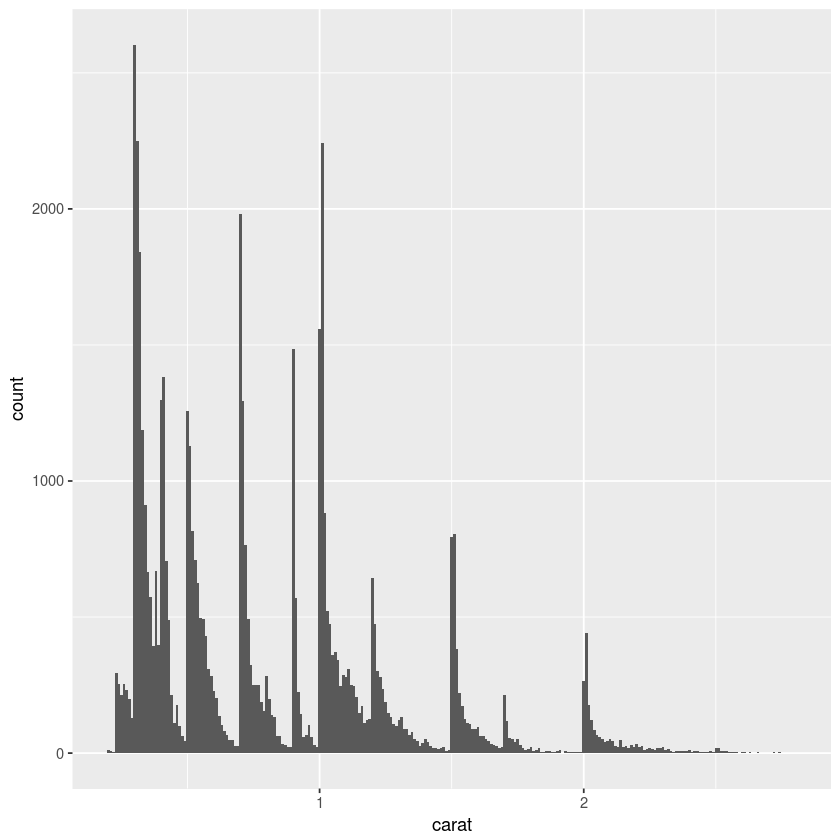

In [8]:
ggplot(data = smaller, mapping = aes(x = carat)) + geom_histogram(binwidth = 0.01)

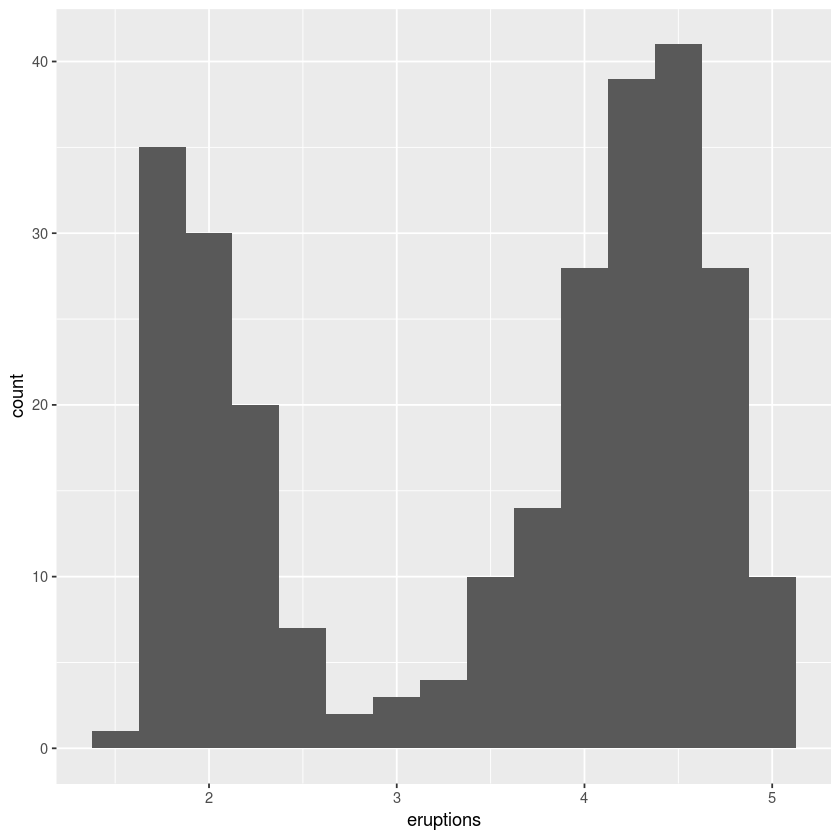

In [9]:
# The histogram below shows the length of 272 eruptions of the old faithful geyser.
# There are short eruptions (of around 2 minutes) and long eruptions (4-5 minutes), but little in between
ggplot(data = faithful, mapping = aes(x = eruptions)) + geom_histogram(binwidth = 0.25)

# Unusual Values

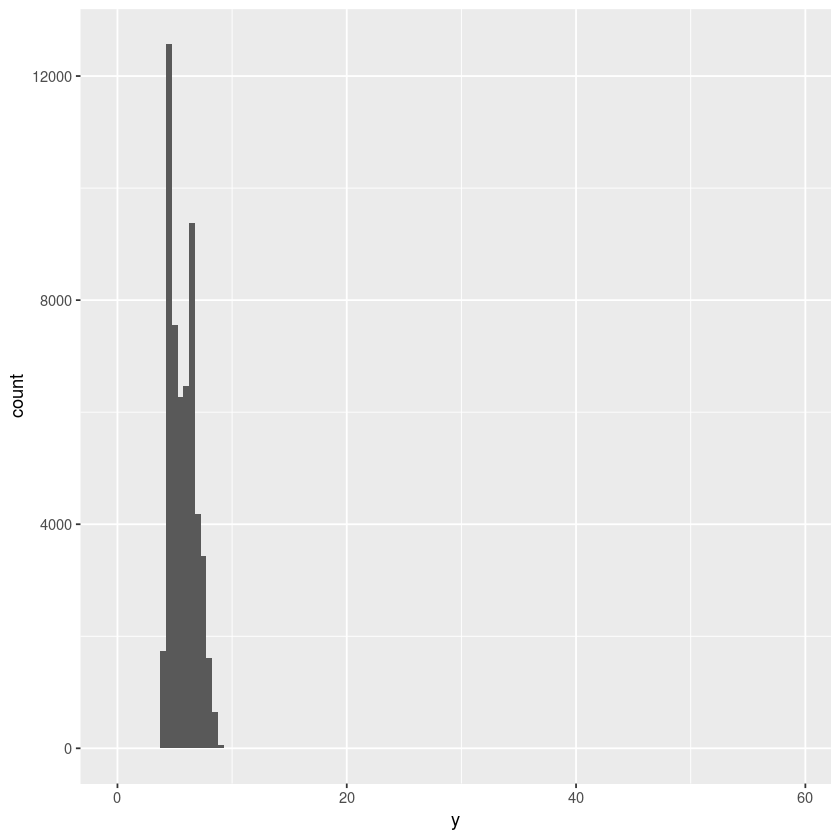

In [10]:
# Outliers are observations that are unusual
ggplot(diamonds) + geom_histogram(mapping = aes (x = y), binwidth = 0.5)

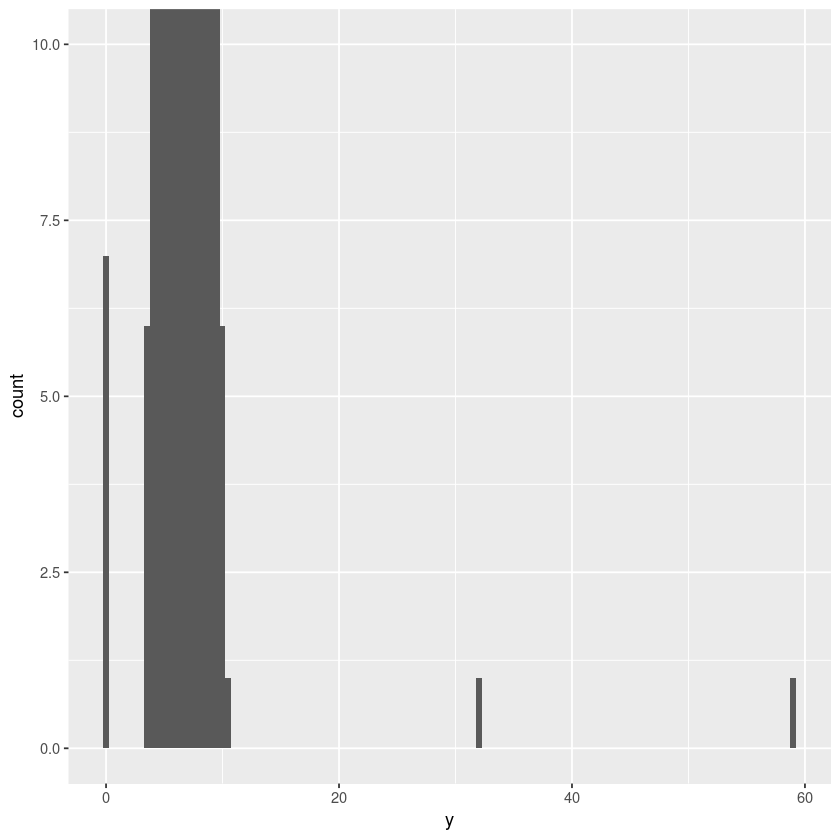

In [11]:
# There are so many observations in the common bins that the rare bins are so short that you can't see them
# To make it easy to see the unusual values, we need to ZOOM VALUES of the y-axis with "coord_cartesian()
# here we have done ylim = (0,10) (limitation of y-axis is 10) can also use XLIM()
ggplot(diamonds) + geom_histogram(mapping = aes(x=y), binwidth = 0.5) + coord_cartesian(ylim = c(0,10))

In [12]:
# This will show us the values of above graph(how many values of y are below 3 and above 20)
unusual  <- diamonds %>%
filter(y < 3 | y > 20) %>% 
select(price, x, y, z) %>%
arrange(y)

unusual
# We know that diamonds can't have width of 0mm, so these values must be incorrect.
# we might also suspect that measurements of 32mm and 59mm are implausible

price,x,y,z
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


In [13]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


ERROR: Error in +coord_cartesian(xlim = c(10000, 20000), ylim = c(0, 1000)): invalid argument to unary operator


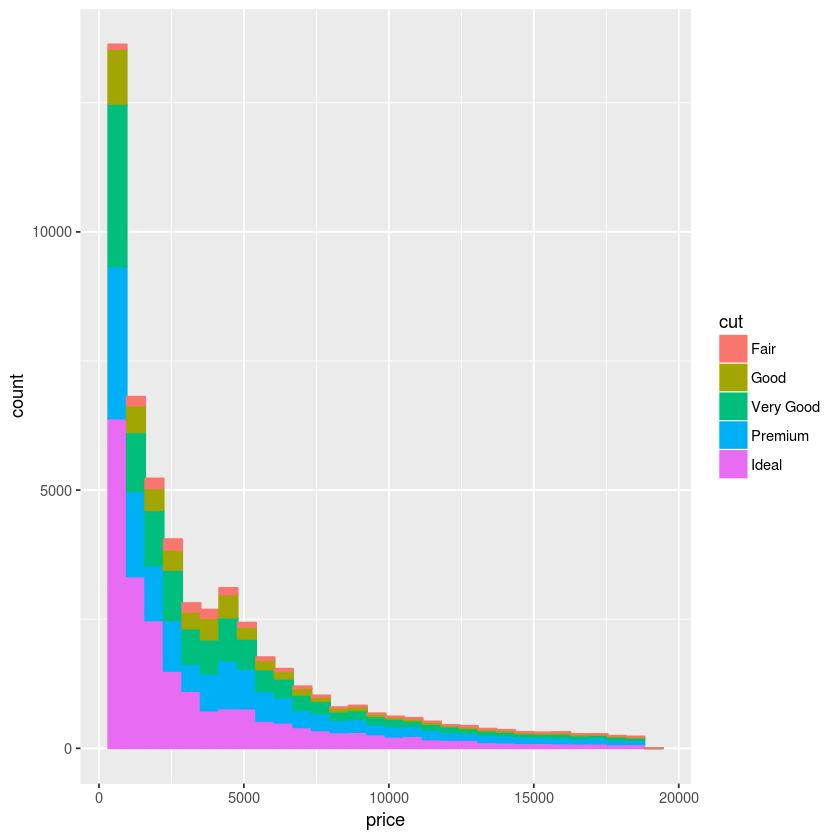

In [14]:
# when we don't choose bin width it'll automatically choose the bandwidth
ggplot(diamonds) + geom_histogram(mapping = aes(x = price, color = cut, fill = cut))
+ coord_cartesian(xlim = c(10000,20000),ylim = c(0,1000))

In [15]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [16]:
# how many diamonds are 0.99 & 1 carat
diamonds %>%
filter(carat %in% c(0.99,1)) %>%
count(carat)

carat,n
0.99,23
1.00,1558


# Missing Values

In [17]:
# If we have encuntered unusual values in dataset, we have two options
# 1. Drop the entire row with the strange values
diamonds2  <- diamonds %>%
filter(between(y,3,20))
diamonds2
# Don't recommend this option because just one measurement is invalid,doesn't mean all the measurements are.

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61,338,4.00,4.05,2.39


In [18]:
# 2. Recommended is replacing the unusual values with missing values.
# ifelse() has three arguments, first is test should be logical vector, The result will contain the value of the second argument "yes" when test is TRUE,
# and the value of third argument no when it is FALSE
diamonds2  <- diamonds %>%
mutate (y = ifelse(y < 3 | y > 20, NA, y))

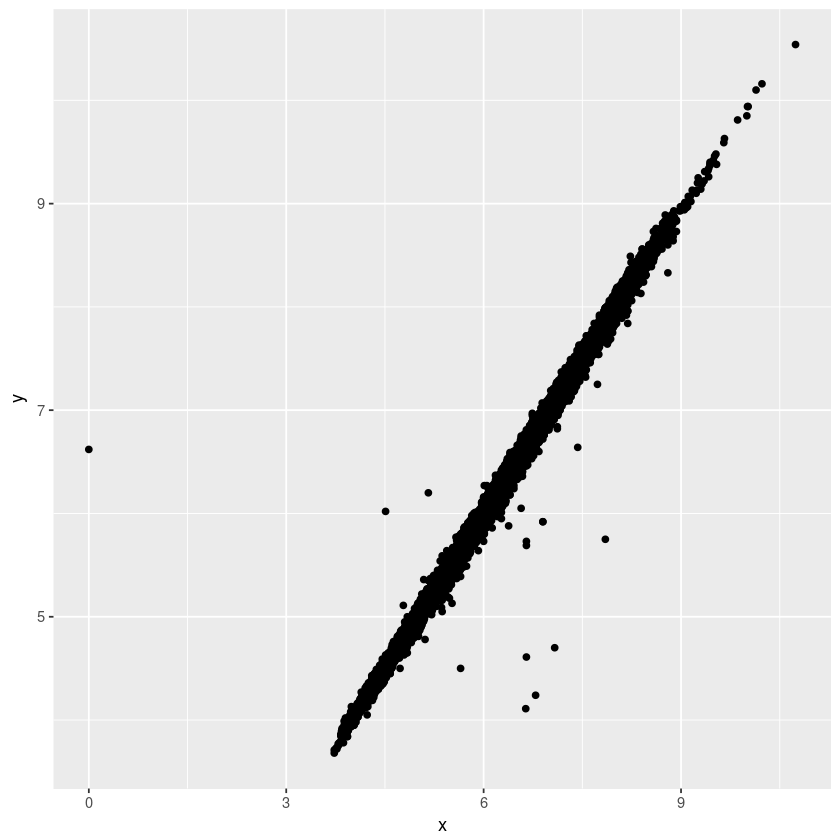

In [19]:
ggplot(diamonds2, mapping = aes(x = x , y= y)) + geom_point(na.rm = TRUE)

In [20]:
head(flights)

ERROR: Error in head(flights): object 'flights' not found


In [21]:
load('flights.rda')

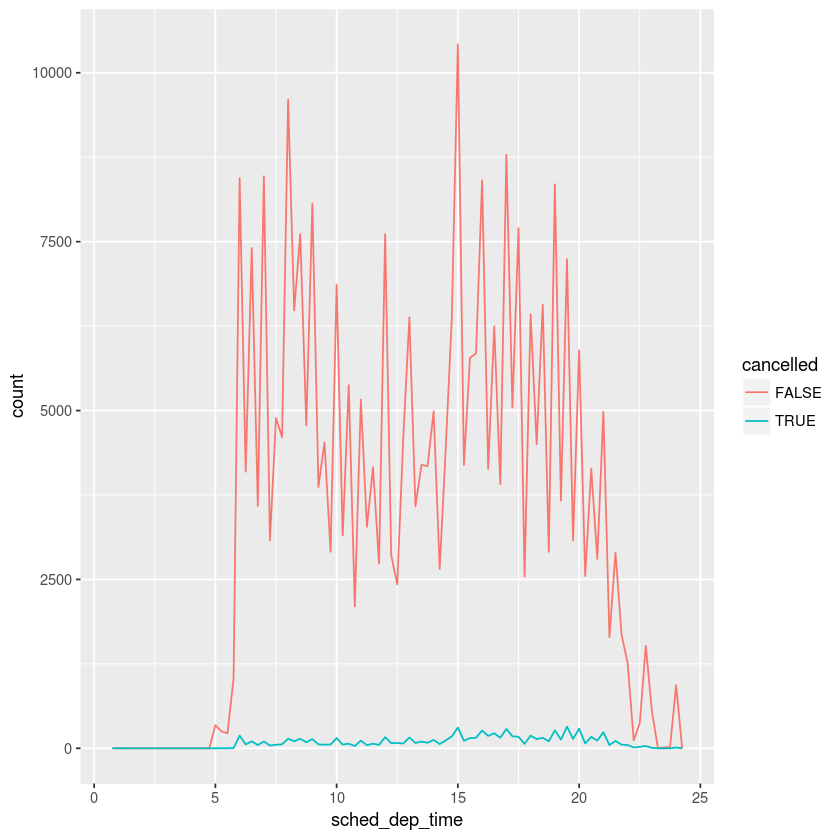

In [22]:
# in NYCflights13, missing values in the dep_time variable indicates that the flights was cancelled.
# if we might want to compare the scheduled departure times for cancelled and non-cancelled flights
flights %>%
mutate(cancelled = is.na(dep_time), # this will give us TRUE & FALSE answer 
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min/60
      ) %>%

ggplot(mapping = aes(sched_dep_time)) + geom_freqpoly(mapping = aes(color = cancelled), binwidth = 1/4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


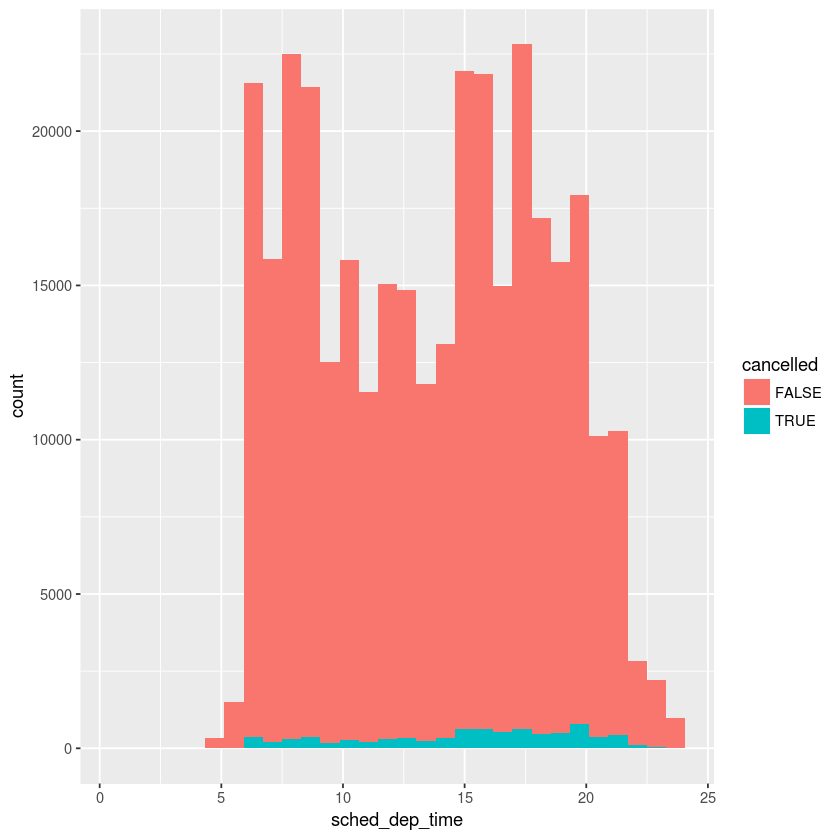

In [23]:
# What happened to missing values in histogram or bar chart
flights %>%
mutate(cancelled = is.na(dep_time), # this will give us TRUE & FALSE answer 
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min/60
      ) %>%

ggplot(mapping = aes(sched_dep_time)) + geom_histogram(mapping = aes(fill = cancelled))

# Covariation

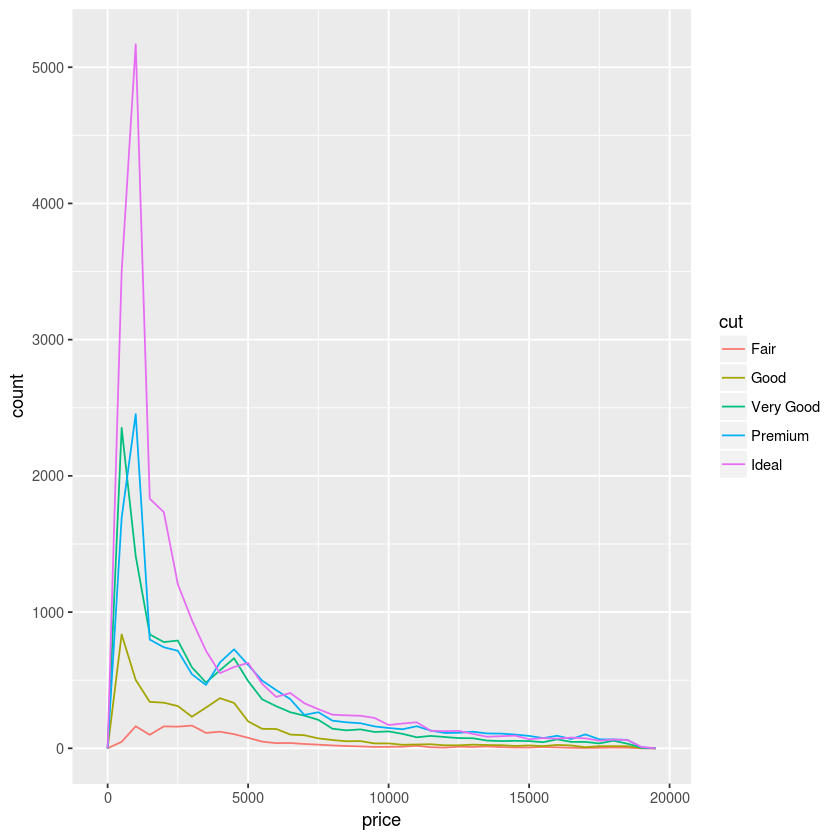

In [24]:
# Variation = the behavior within a variable , Covariation = tendency for the values of two or more variables to vary together in a related way
# The best way to spot covariation is to visulise the relationship between two variables
# geom is given by the count. That means if one of the groups is much smaller than the others, it's hard to see the differences in shape
ggplot(data = diamonds, mapping = aes(x = price)) + geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

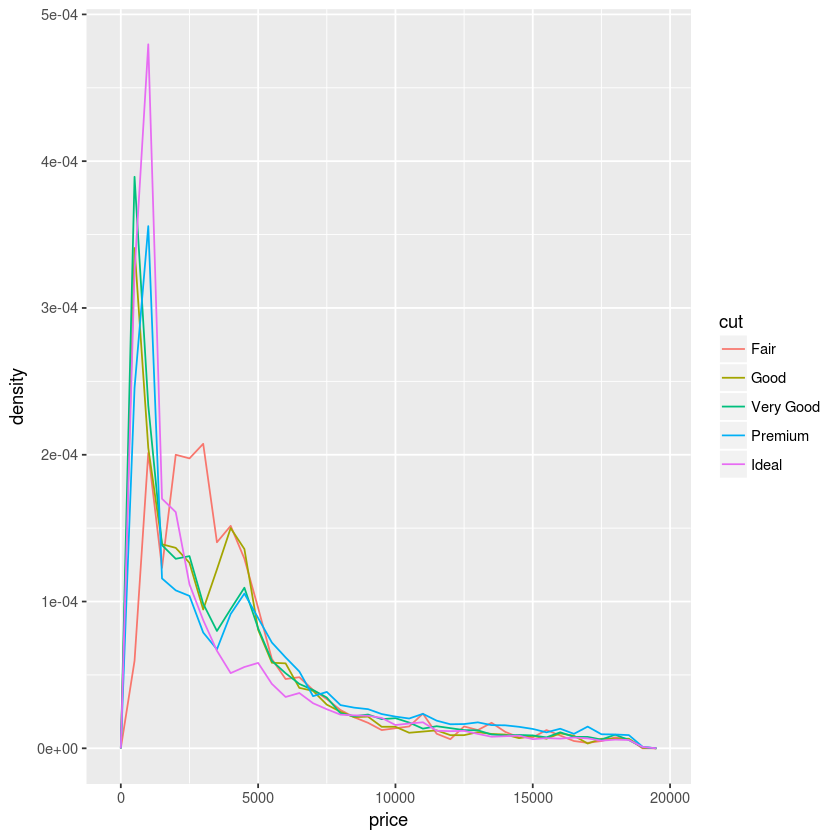

In [25]:
# To make the comparison easier we need to swap what is displayed on the y-axis.
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) + geom_freqpoly(mapping = aes(color = cut), binwidth = 500) 

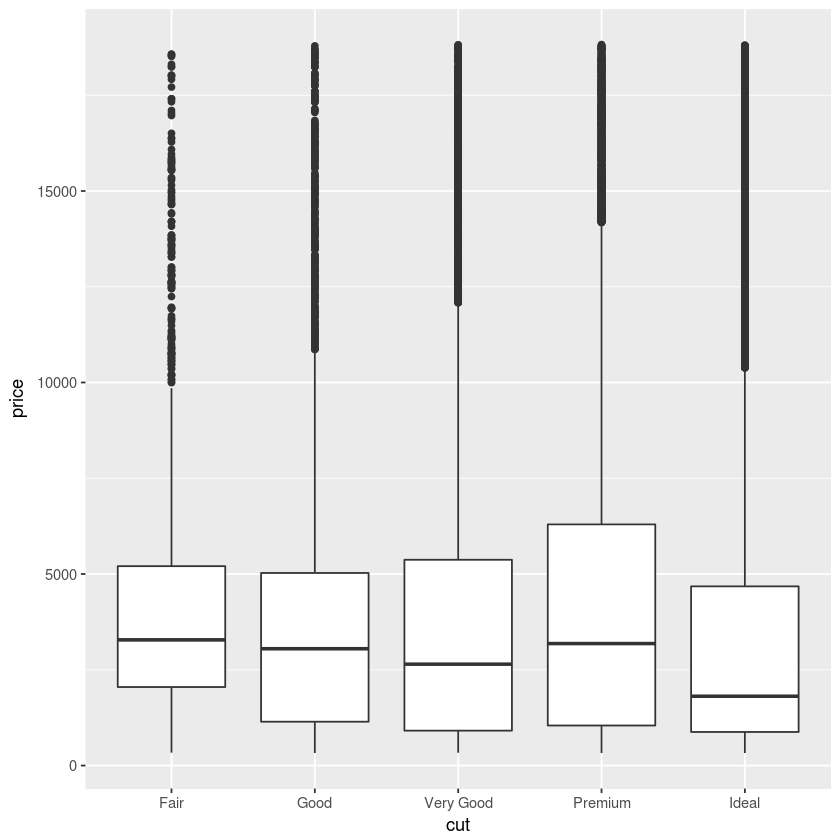

In [26]:
# Boxplot = boxplot is a type of visual shorthand for a distribution of values
# A box that stretches from the 25th percentile of the distribution to the 74th percentile,distance known as the Interquartile range(IQR)
# In the middle of the box is a line taht displays the median e.g 50th percentile, of the distribution.
# These three lines give you a sense of the spread of the distribution and whether or not the distribution is symmetric about the median or skewed to one side
# Visual points that display observations that fall more than 1.5 times the IQR from either edge og the box, these points are unusual so are plotted individually
# And outside 1.5 IQR called "outliers".A line(or whisker) that extends from each end of the box and goes to the farthest non-outlier point in the distribution
ggplot(data = diamonds, mapping = aes(x = cut, y=price)) + geom_boxplot()

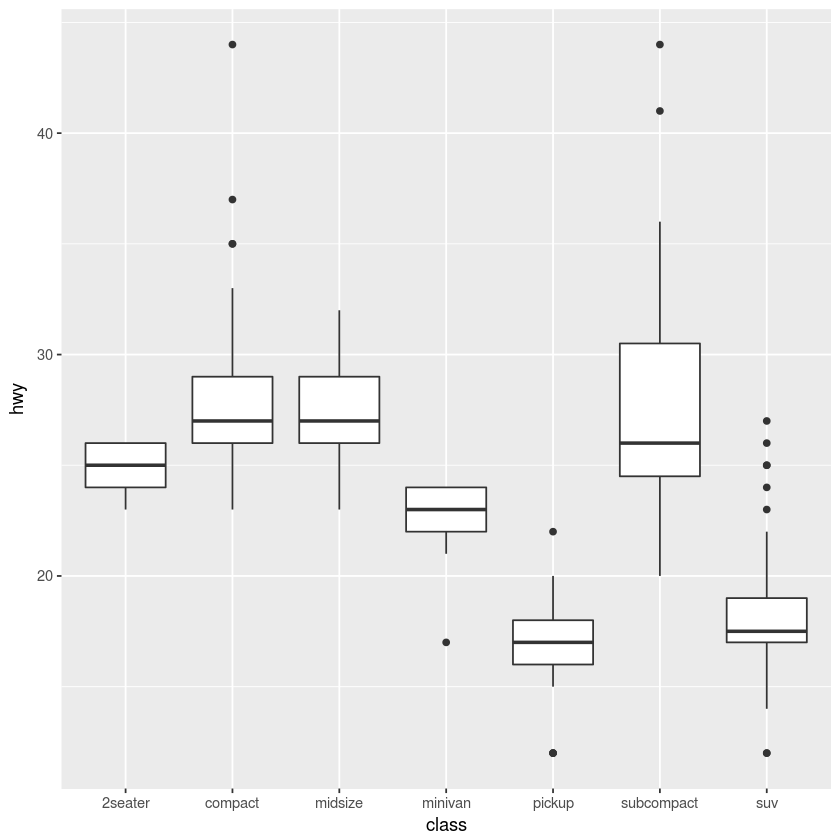

In [27]:
# take the mpg dataset
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_boxplot()

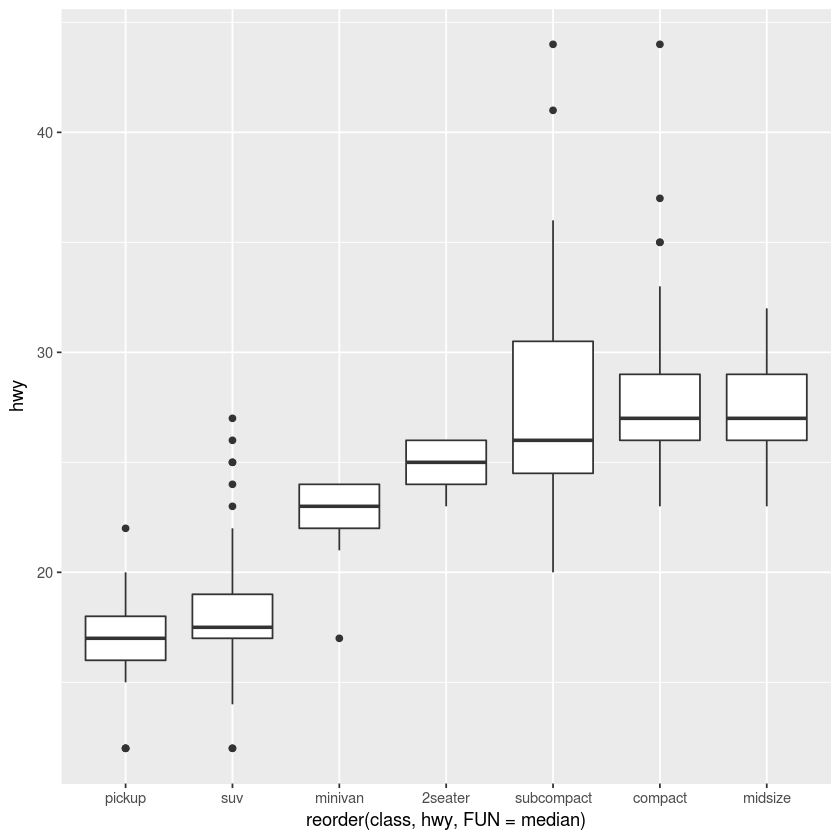

In [28]:
# To make the trend easier to see, we can reorder class based on the median value
ggplot(data = mpg) + geom_boxplot(mapping = aes(x = reorder(class,hwy, FUN = median), y = hwy))

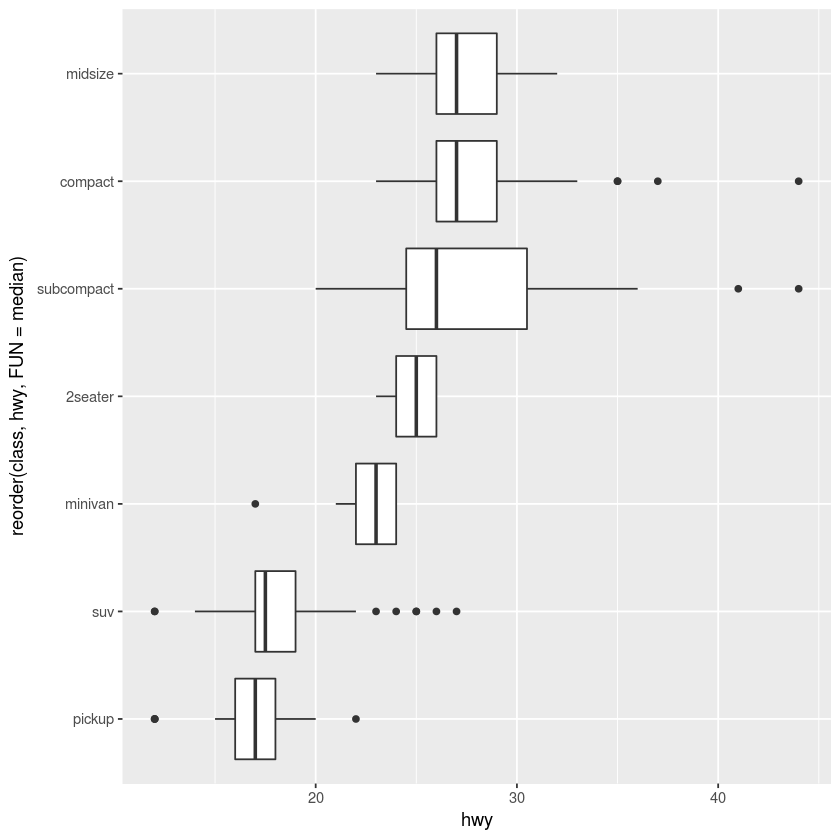

In [29]:
# If we have long variable names, we can flip it by using coord_flip()
ggplot(data = mpg) + geom_boxplot(mapping = aes(x = reorder(class,hwy, FUN = median), y = hwy))+coord_flip()

In [30]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


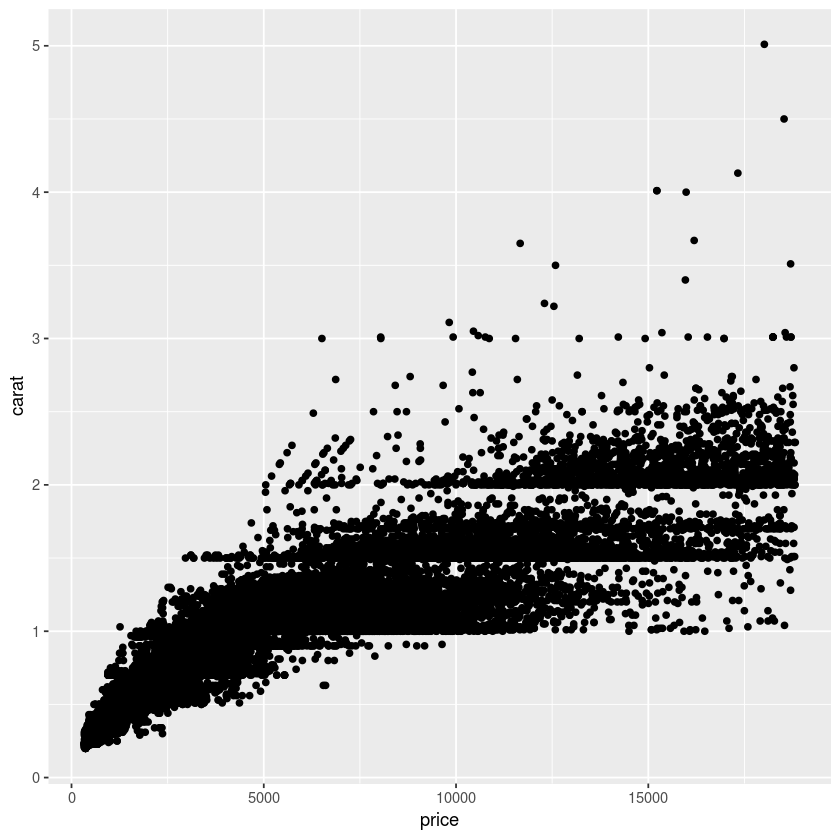

In [31]:
# what variable in the diamonds dataset is most important for predicting the price of diamond
ggplot(data = diamonds) + geom_point(mapping = aes(x = price, y = carat))

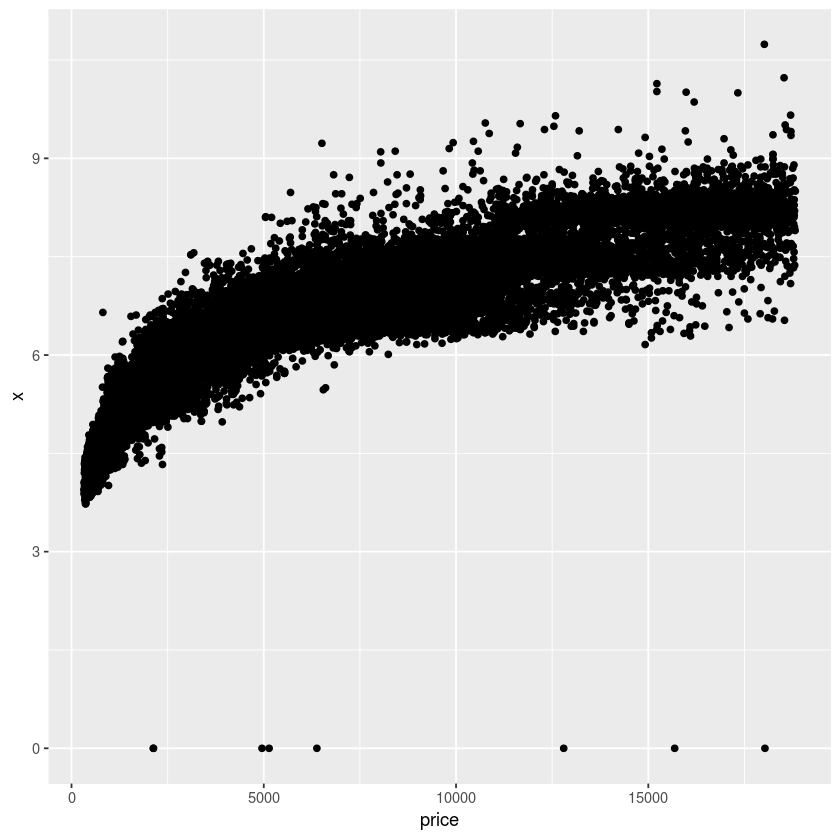

In [32]:
ggplot(data = diamonds) + geom_point(mapping = aes(x = price, y = x))

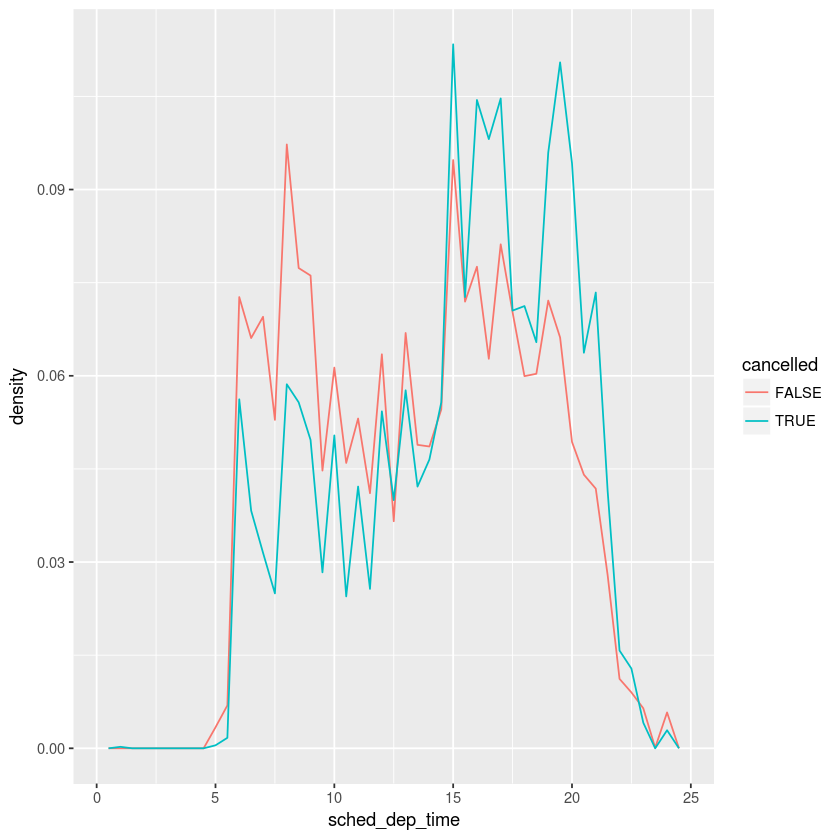

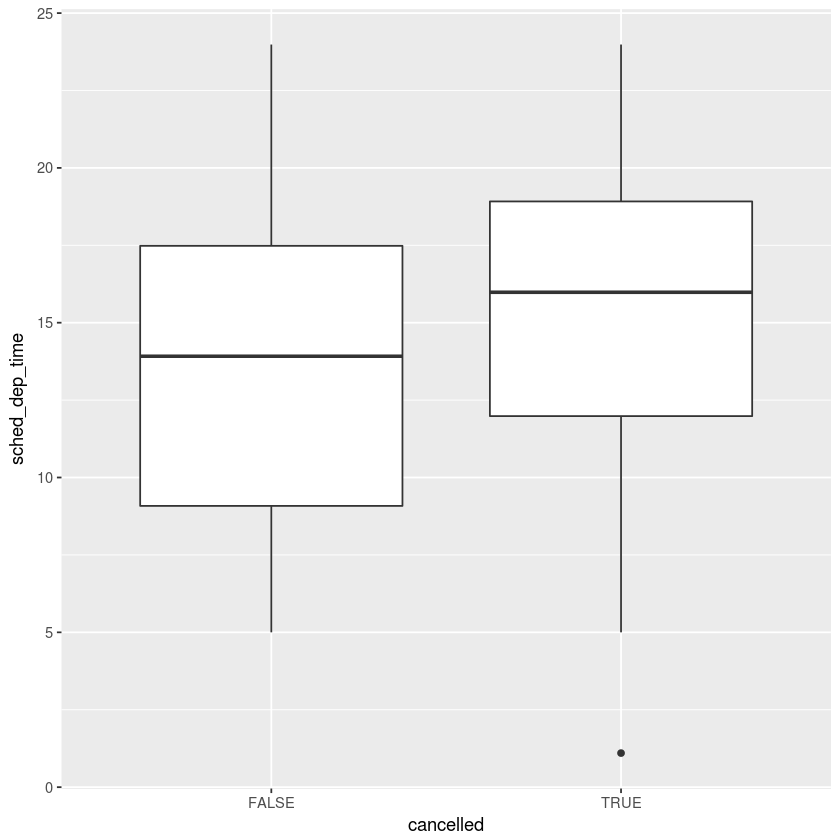

In [33]:
# How to improve the visualisation of the departure of cancelled vs sched_dep_time
fl <- 
  flights %>%
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  )

fl %>%
  ggplot(aes(sched_dep_time, ..density.., colour = cancelled)) +
  geom_freqpoly(binwidth = 1/2)

fl %>%
  ggplot(aes(cancelled, sched_dep_time)) +
  geom_boxplot()

# Two categorical variable

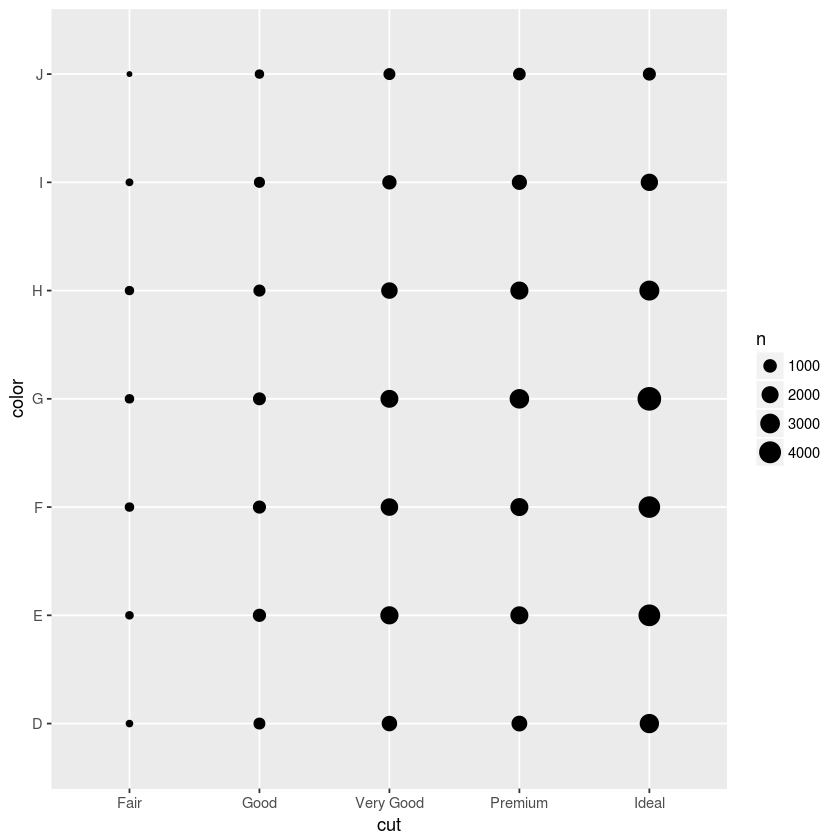

In [34]:
# To visulise the covariation between categorical variables,we need to count the number of observations for each combination
# We can use same ggplot(data = diamonds) + geom_count(mapping = aes(x = cut, y = color)) and also
ggplot(data = diamonds) + geom_count(aes(cut,color))

In [35]:
diamonds %>%
count(color, cut)

color,cut,n
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337
E,Ideal,3903


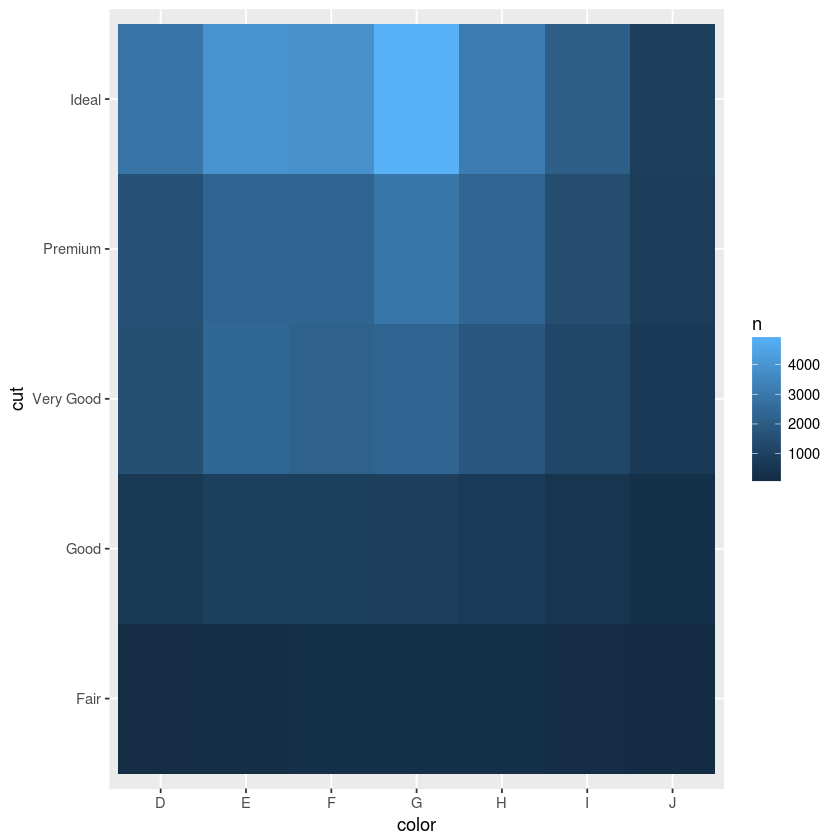

In [36]:
# Visulize with geom_tile() and the fill asthestic
diamonds %>%
count(color, cut) %>%
ggplot(aes(color,cut)) + geom_tile(aes(fill = n))

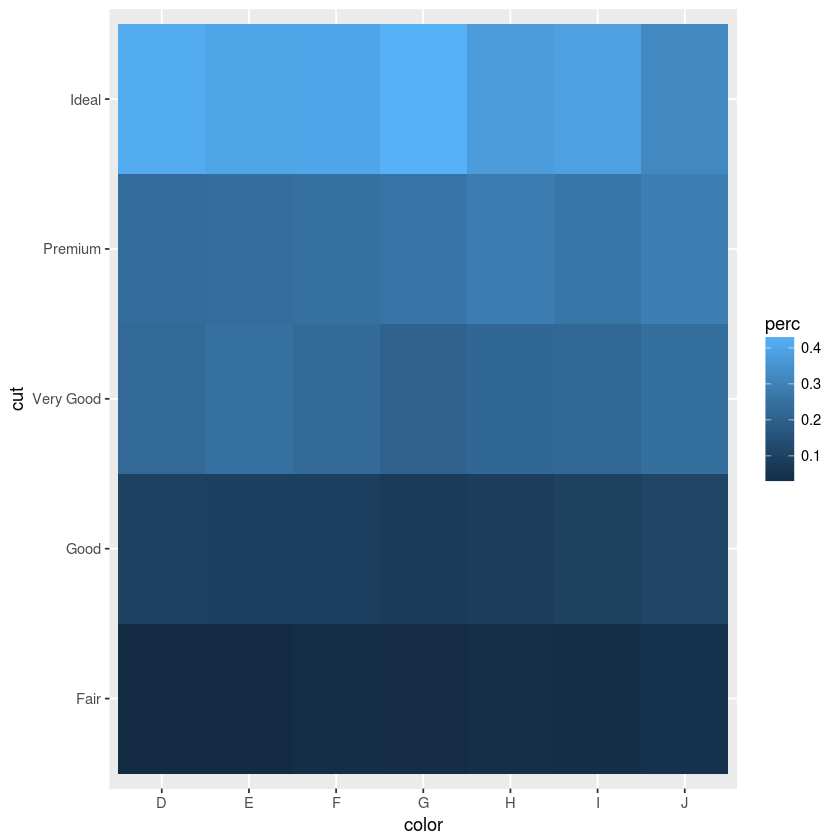

In [37]:
# How could you rescale the count dataset above to more clearly show the distibution of cut within color or color within cut?
diamonds %>%
count(color, cut) %>%
group_by(color) %>%
mutate(perc = n / sum(n)) %>%

ggplot(aes(color, cut)) + geom_tile(aes(fill = perc))



In [38]:
# Use geom_tile() together with dplyr to explore how average flight delays vary by destination and month of year.
ggplot(aes(x = month, y = dest, fill = dep_delay)) + geom_tile()

ERROR: Error: ggplot2 doesn't know how to deal with data of class uneval


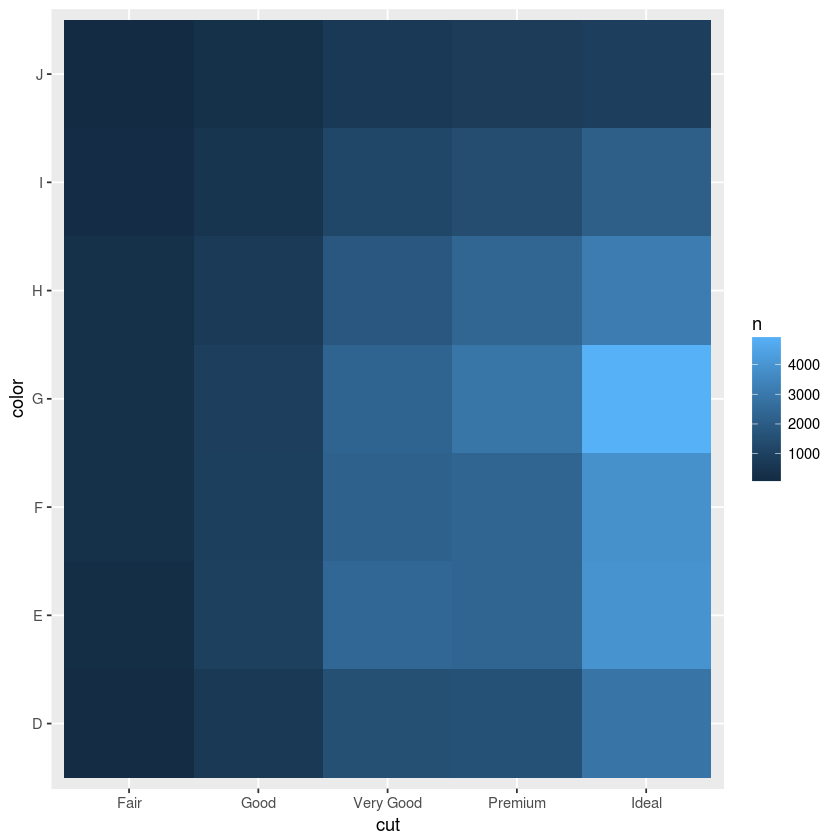

In [39]:
# Why is it slightly better to use aes(x = color, y = cut) rather than aes(x = cut, y = color) in the example above?
diamonds %>%
count(color, cut) %>%
ggplot(aes(cut,color)) + geom_tile(aes(fill = n))

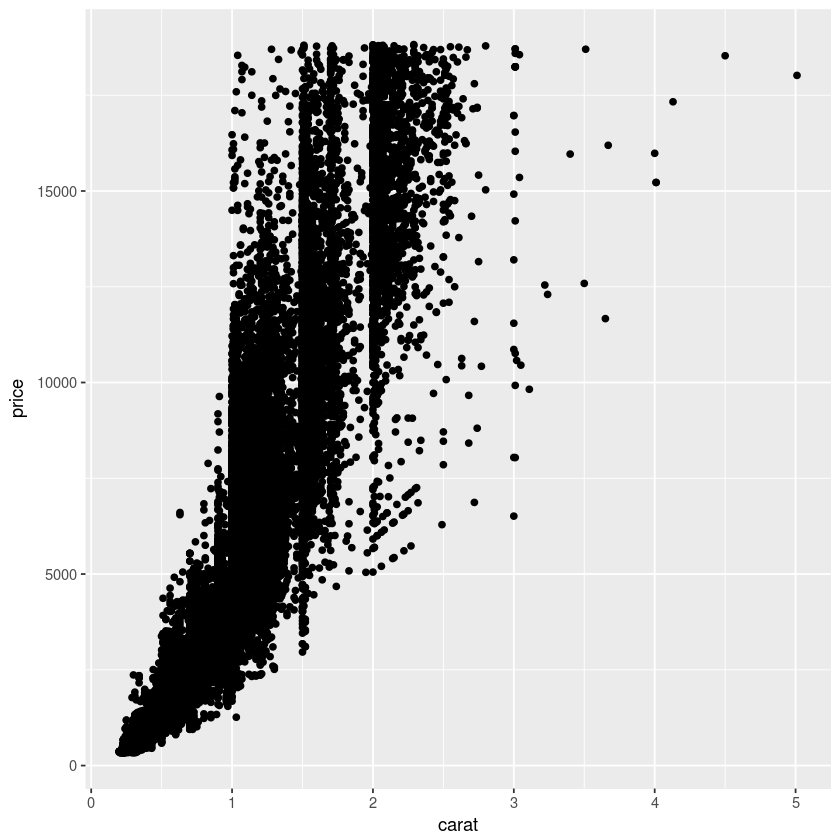

In [40]:
# Two continuous variables
# here we can see exponential relationship between the carat size and price
ggplot(diamonds) + geom_point(aes(carat,price))

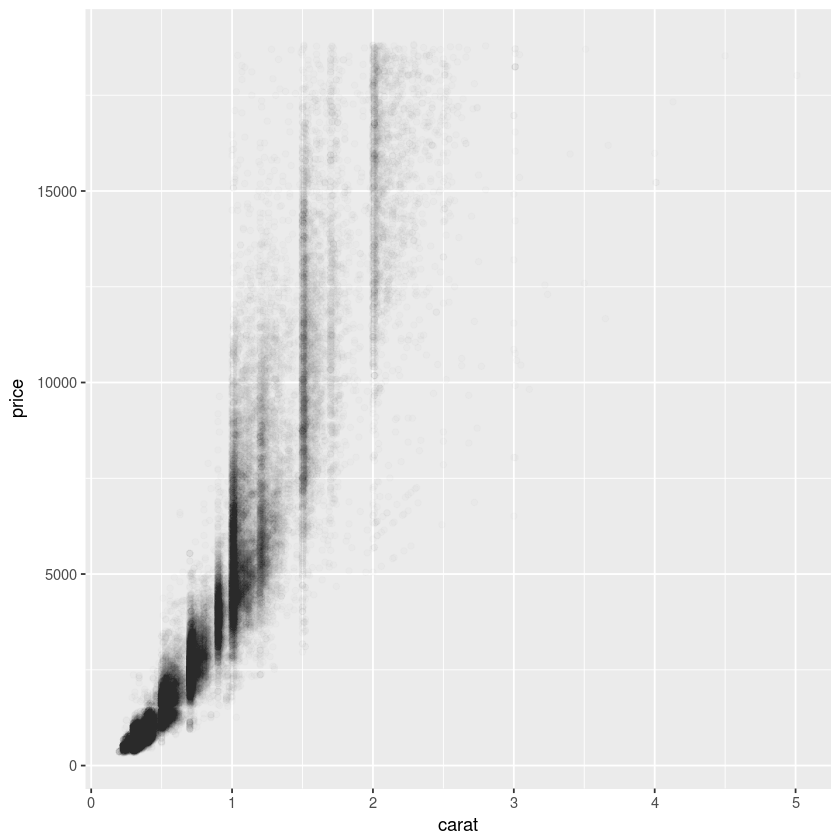

In [44]:
# If dataset size is big then it's going to overlap the plot so better way to use alpha
ggplot(diamonds) + geom_point(aes(carat, price), alpha = 1/100)

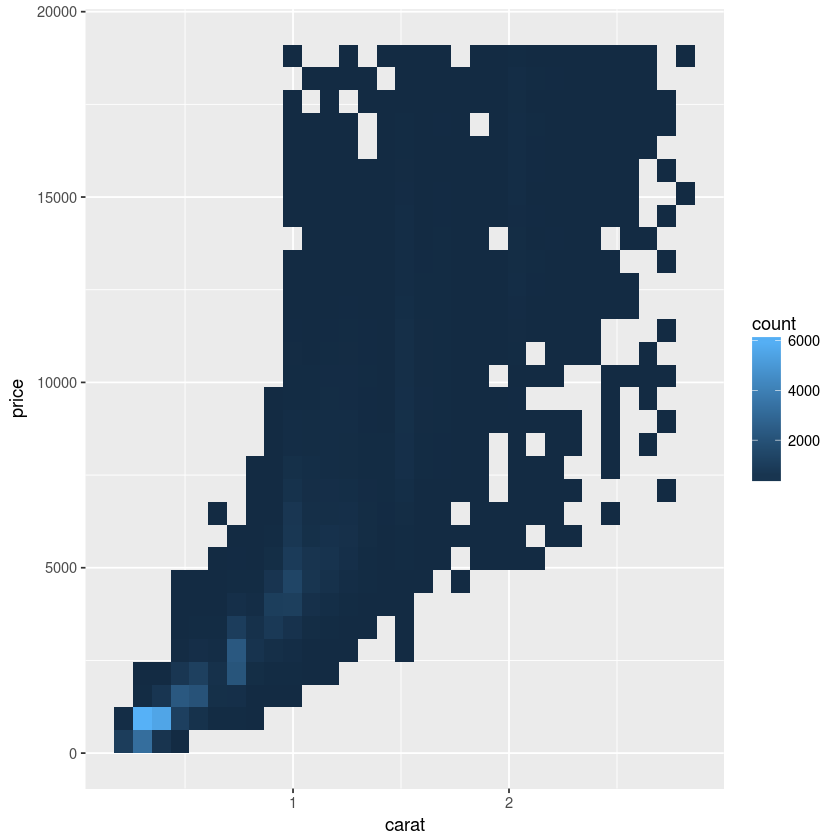

In [45]:
# use of geom_bin2d() and geom_hex() to bin in two dimension
# these two divide the coordinate plane into 2d bins and then use a fill color to display how man points fall into each bin
# geom_bin2d = rectangular bins, geom_hex = hexagonal bins
ggplot(data = smaller) + geom_bin2d(aes(carat, price))

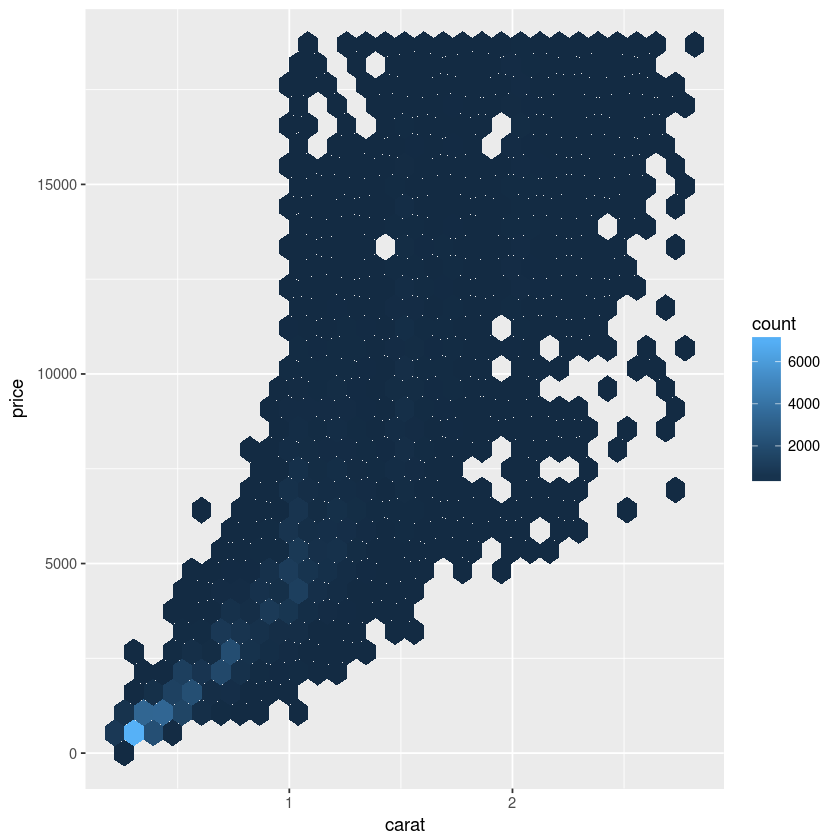

In [46]:
# using geom_hex
ggplot(data = smaller) + geom_hex(aes(carat, price))

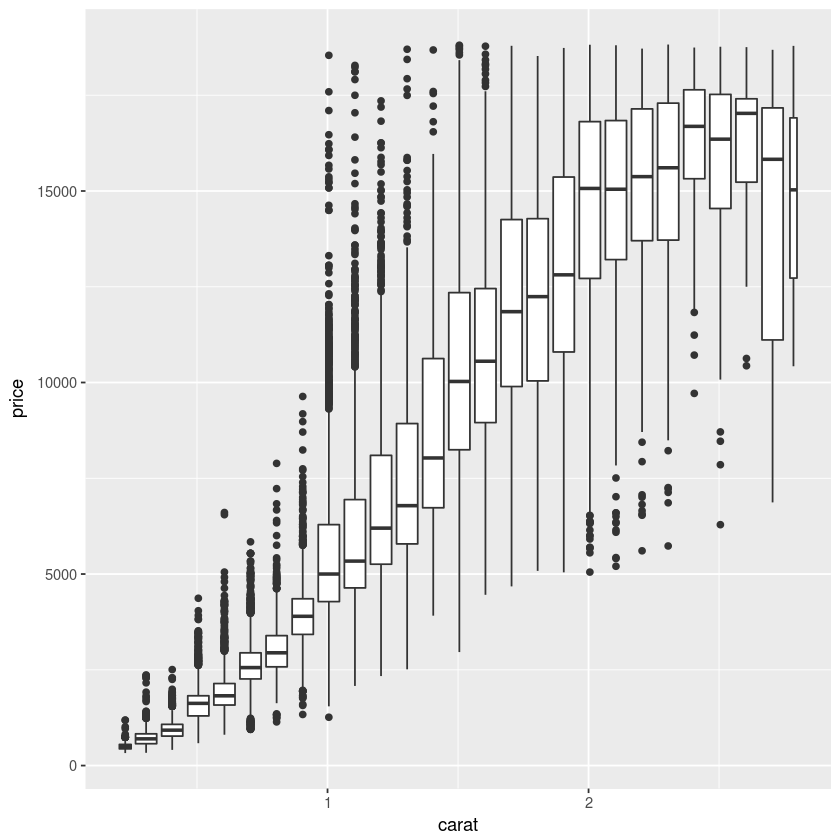

In [47]:
# Another option is to bin one continuous variable so it acts like a categorical variable
# we can bin "carat" and then for each group, display a boxplot
ggplot(data = smaller, aes(carat,price)) + geom_boxplot(aes(group = cut_width(carat, 0.1)))

# cut_width(x, width) as used above, divides 'x' into bins of width
# one way to show that is to make the width of the boxplot propotional to the number of points with varwith = TRUE

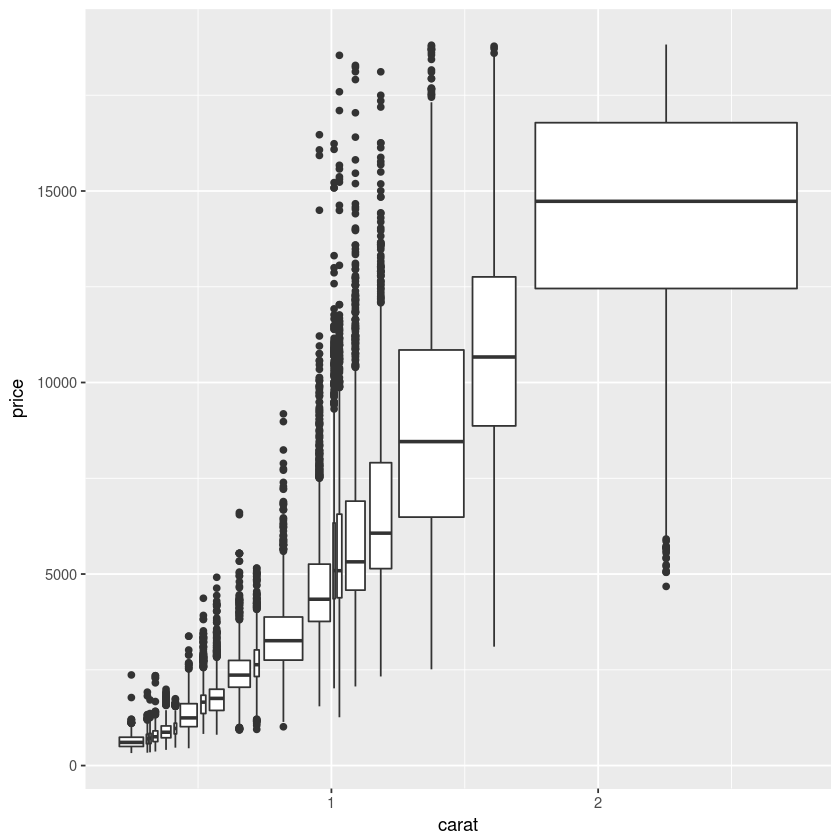

In [48]:
# Another approach is to display approximately the same number of points in each bin
# That's the job of cut_number()
ggplot(smaller, aes (carat, price)) + geom_boxplot(aes(group = cut_number(carat,20)))

In [49]:
mydata  <- diamonds %>%
group_by(carat) %>%
mutate(volume = x*y*z) %>%
arrange(desc(volume)) %>%
select(carat, depth, price, volume)

In [50]:
mydata  <-  mydata[-c(1:5),]
head(mydata)

carat,depth,price,volume
4.13,64.8,17329,633.3550
4.01,61.0,15223,631.8944
4.00,63.3,15984,627.8412
4.01,62.5,15223,621.4965
3.67,62.4,16193,592.9341
3.65,67.1,11668,576.3973


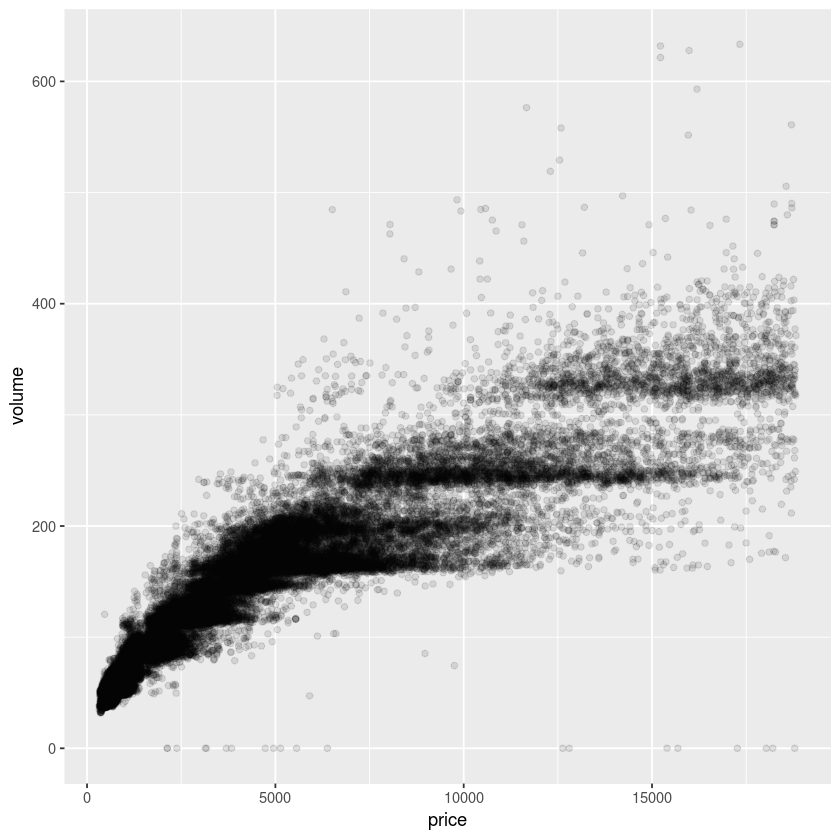

In [51]:
ggplot(mydata,aes(price, volume)) + geom_point(alpha = 1/10)

Warning message:
“position_dodge requires non-overlapping x intervals”

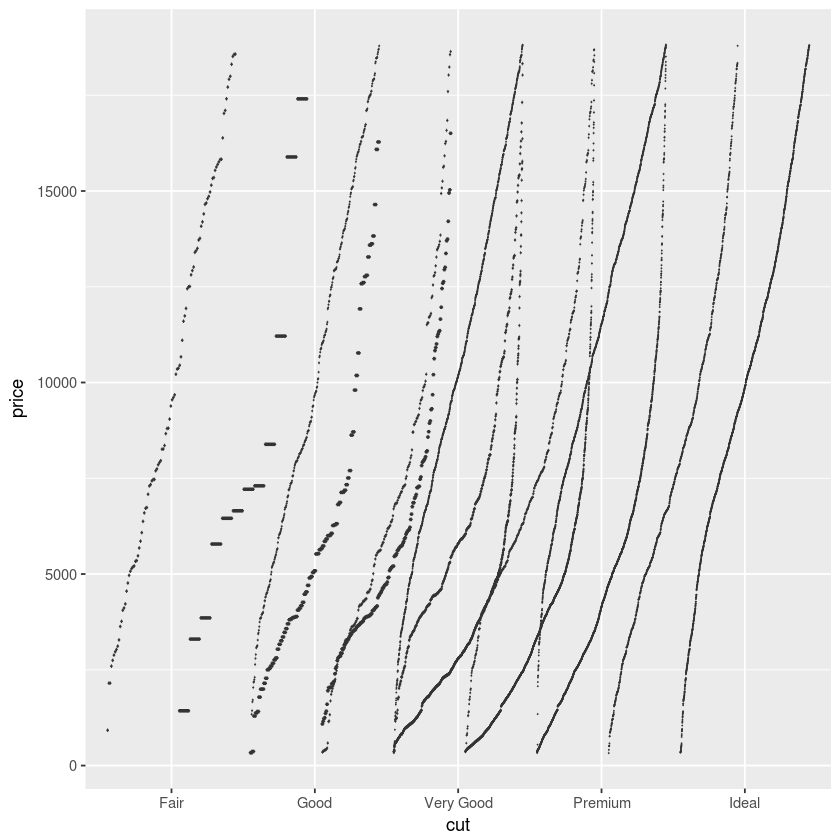

In [52]:
# combine two of the techniques you've learned to visualise the combined distribution
ggplot(smaller, aes(cut, price)) + geom_boxplot(aes(group = cut_width(price,0.2)))

# Patterns and models

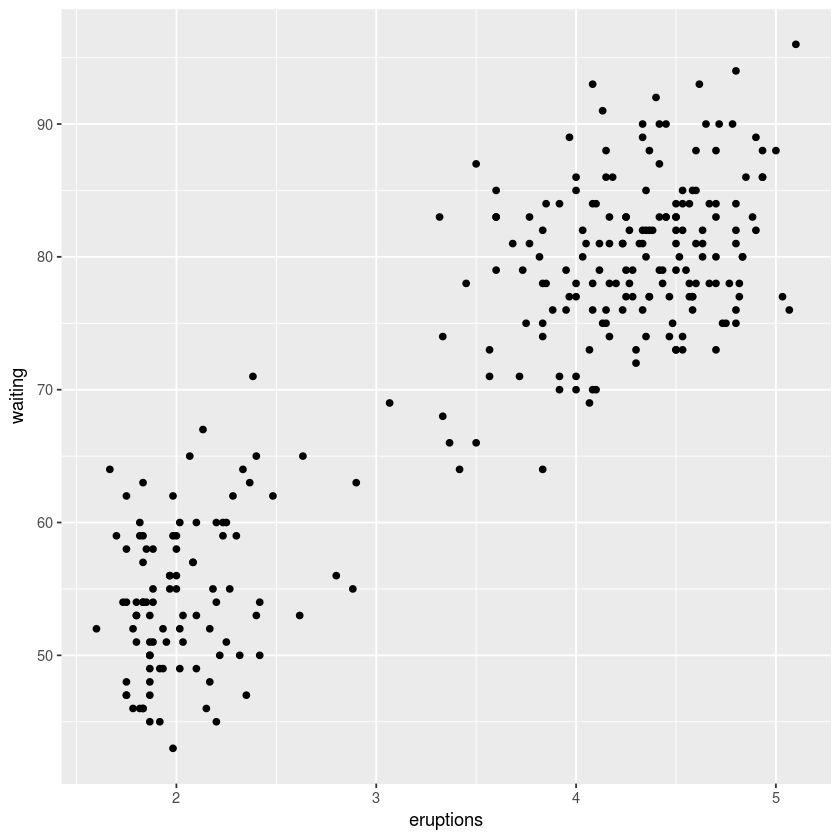

In [56]:
# A scatterplot of old faithful eruption lengths vs the wait time between eruptions
ggplot(data = faithful) + geom_point(aes(eruptions, waiting))

In [57]:
# This code fits a model that predicts "price" from 'carat' and then computes the residules
library(modelr)
mod  <- lm(log(price) ~ log(carat), data = diamonds)

diamonds2  <- diamonds %>%
add_residuals(mod) %>%
mutate(resid = exp(resid))

head(diamonds2)

carat,cut,color,clarity,depth,table,price,x,y,z,resid
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0.8196681
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0.9546565
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0.8221824
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0.5694586
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0.5107668
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0.7866561


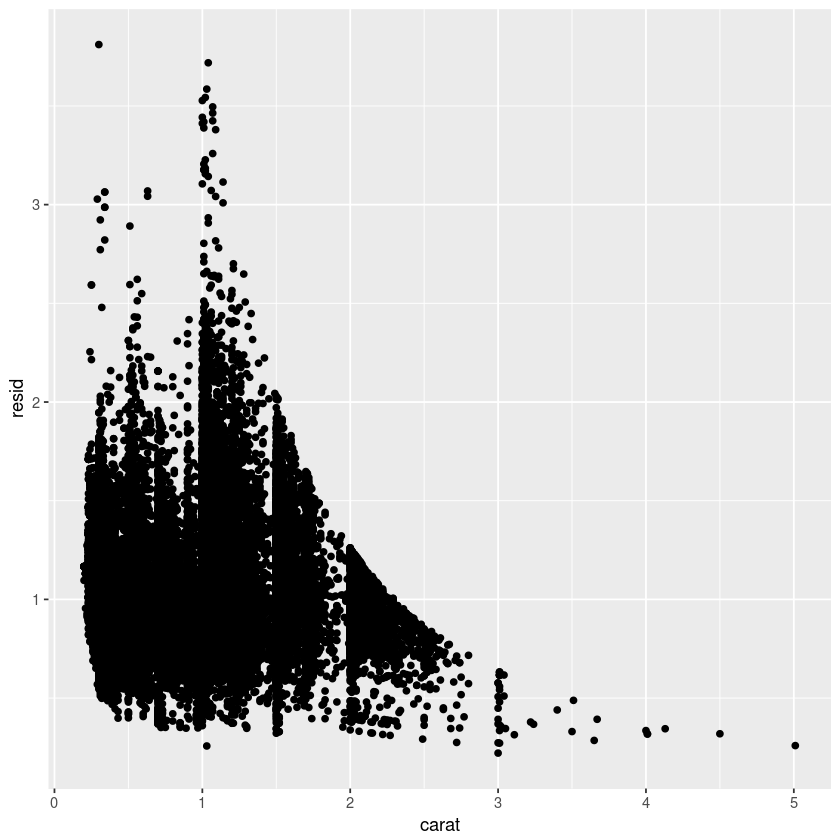

In [58]:
ggplot(data = diamonds2) + geom_point(mapping = aes(x = carat, y = resid))

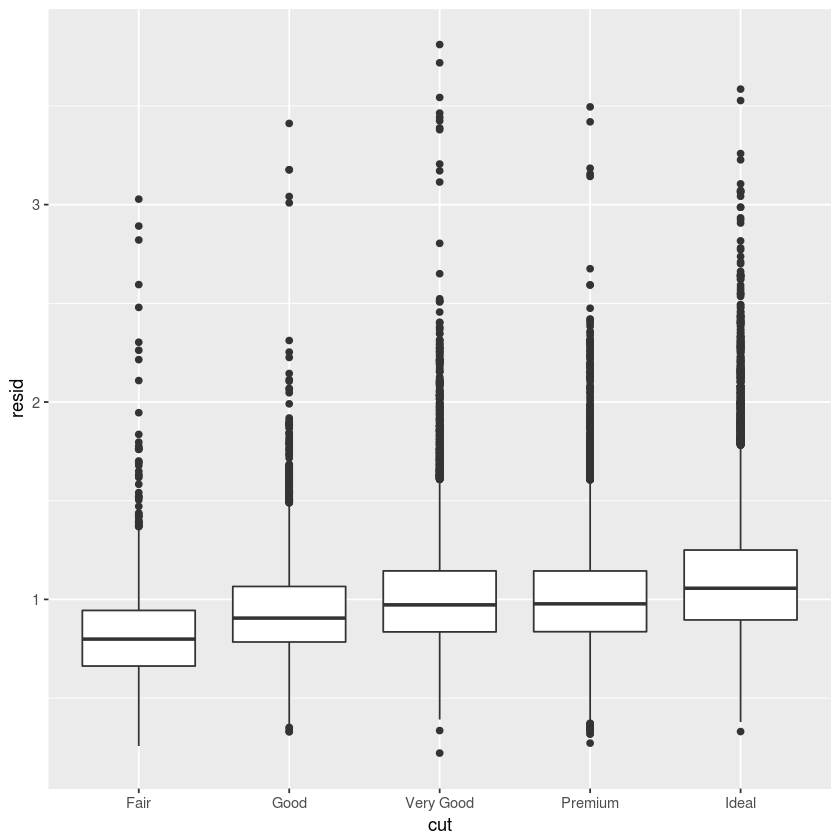

In [59]:
# once we removed the strong relationship between carat and price, we can see what we ecpect in the relationship between cut and price
ggplot(diamonds2) + geom_boxplot(aes(cut, resid))

# ggplot2 calls

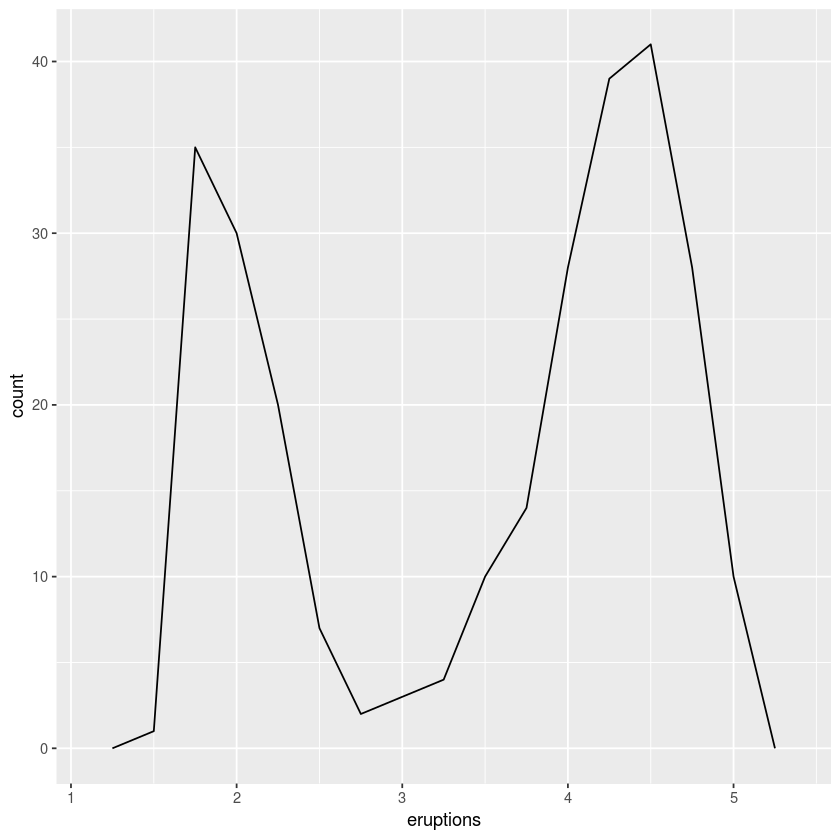

In [60]:
# same code: ggplot(faithful, aes(eruptions)) + geom_freqpoly(binwidth = 0.25)
ggplot(data = faithful, mapping = aes(x = eruptions)) + geom_freqpoly(binwidth = 0.25)

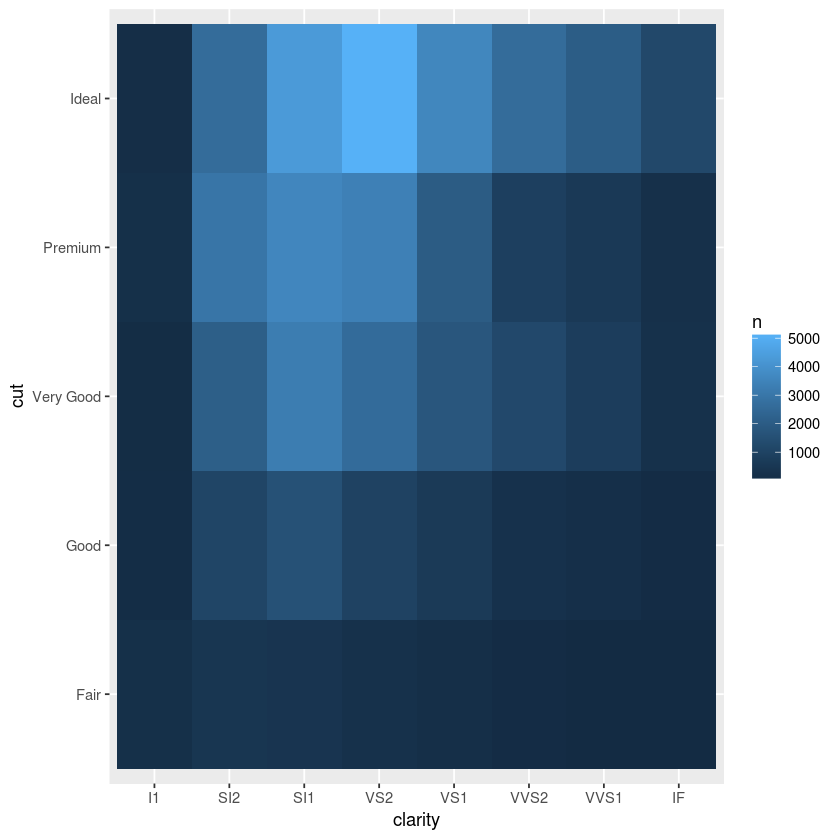

In [61]:
# Same as above, don't need to write mappings and (x = , y = )
diamonds %>%
count(cut, clarity) %>%
ggplot(aes(clarity, cut, fill = n)) + geom_tile()